In [1]:
# 그럼 첫번째 레슨 : 라이브러리 불러오기

#필요한 딥러닝 관련 라이브러리를 불러옵니다.

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# 🗂️ Step 2: 데이터 불러오기

#CIFAR-10 데이터셋을 불러오고, 학습용/테스트용으로 분리합니다.

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 39s 0us/step


## 과제1. 데이터의 구조를 살펴보세요. 사이즈는?

In [5]:
# 여기에서 확인해 보세요.

print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
print("Unique labels:", tf.unique(tf.reshape(train_labels, [-1]))[0].numpy())

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
Unique labels: [6 9 4 1 2 7 8 3 5 0]


In [6]:
# 🏷️ Step 3: 클래스 이름 정의

#CIFAR-10의 라벨은 숫자로 되어 있으므로, 사람이 이해할 수 있도록 이름을 부여합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

## 과제2. 아래 코드의 빈칸을 채워 CNN 모델을 완성해보세요. 
#### layer나 패딩 혹은 drop out, batch normalization을 추가해 가며 모델의 정확도 변화를 보는 것도 좋습니다.

In [7]:
# 🧱 Step 4: CNN 모델 구성
# Convolution → MaxPooling → Flatten → Dense 구조로 CNN을 설계합니다.
# 아래의 빈칸 (___)을 채워 모델을 완성해보세요.

model = models.Sequential()

# 첫 번째 합성곱 레이어
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))  # TODO: 커널 개수 설정

# 첫 번째 풀링 레이어
model.add(layers.MaxPooling2D((2, 2)))  # TODO: 풀링 크기 설정

# 두 번째 합성곱 레이어
model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # TODO: 커널 크기 설정

# 두 번째 풀링 레이어
model.add(layers.MaxPooling2D((2, 2)))

# 세 번째 합성곱 레이어
model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # TODO: 커널 개수 설정

# Flatten + Fully Connected Layer
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

/Users/zimin205/boaz/.venv_boaz310/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 자신이 채운 코드를 기반으로 각 레이어별 Feature Map 크기를 계산해 보세요. 
(padding은 디폴트로 없습니다.)

## Answer:
Conv2D(32, (3,3), activation='relu')
출력 크기: (32 - 3 + 1) x (32 - 3 + 1) = 30 x 30
출력 shape: (30, 30, 32)

MaxPooling2D((2,2)) → 절반 크기
출력 shape: (15, 15, 32)

Conv2D(64, (3,3), activation='relu')
(15 - 3 + 1) x (15 - 3 + 1) = 13 x 13
출력 shape: (13, 13, 64)

MaxPooling2D((2,2)) 절반 크기
출력 shape: (6, 6, 64)

Conv2D(64, (3,3), activation='relu')
(6 - 3 + 1) x (6 - 3 + 1) = 4 x 4
출력 shape: (4, 4, 64)

Flatten
Flatten → 4×4×64 = 1024
출력 shape: (1024,)

Dense(64)
출력 shape: (64,)

Dense(10)
출력 shape: (10,) ← CIFAR-10 클래스 수

In [12]:
# ⚙️ Step 5: 모델 컴파일

#모델을 학습할 수 있도록 컴파일합니다. 손실 함수, 최적화 방법, 평가지표를 설정합니다.

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7674 - loss: 0.6760 - val_accuracy: 0.6606 - val_loss: 1.0964
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7788 - loss: 0.6424 - val_accuracy: 0.6560 - val_loss: 1.1070
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7853 - loss: 0.6208 - val_accuracy: 0.6675 - val_loss: 1.1143
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7919 - loss: 0.5967 - val_accuracy: 0.6668 - val_loss: 1.1046
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8024 - loss: 0.5739 - val_accuracy: 0.6472 - val_loss: 1.1724
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8117 - loss: 0.5430 - val_accuracy: 0.6345 - val_loss: 1.2414
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8158 - loss: 0.5342 - val_accuracy: 0.6673 - val_loss: 1.1642
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8229 - loss: 0

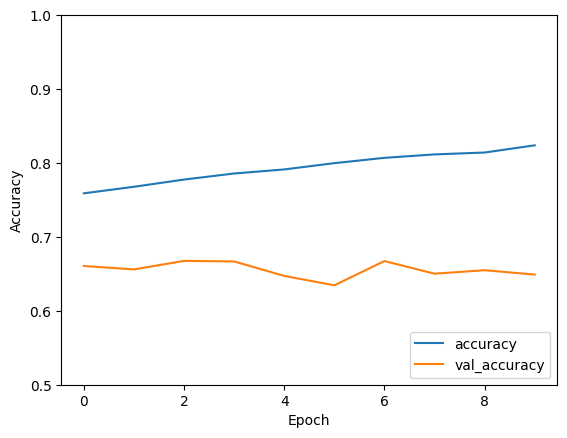

In [13]:
# 🔥 Step 6: 모델 학습 및 성능 평가

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))
#모델 성능 평가
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)


In [16]:
print('Test Accuracy is',test_acc)

Test Accuracy is 0.6489999890327454


In [17]:
model = models.Sequential()

# 1. 첫 번째 합성곱 + 배치 정규화 + 풀링
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# 2. 두 번째 합성곱 + 배치 정규화 + 드롭아웃 + 풀링
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.MaxPooling2D((2, 2)))

# 3. 세 번째 합성곱 + 배치 정규화
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())

# 4. Flatten + Fully Connected Layer + 드롭아웃
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))  # CIFAR-10 → 클래스 10개


/Users/zimin205/boaz/.venv_boaz310/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# ⚙️ Step 5: 모델 컴파일

#모델을 학습할 수 있도록 컴파일합니다. 손실 함수, 최적화 방법, 평가지표를 설정합니다.

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.3012 - loss: 1.9612 - val_accuracy: 0.5124 - val_loss: 1.6180
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5158 - loss: 1.3625 - val_accuracy: 0.5678 - val_loss: 1.3390
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5967 - loss: 1.1384 - val_accuracy: 0.5727 - val_loss: 1.4627
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.6423 - loss: 1.0168 - val_accuracy: 0.6615 - val_loss: 1.1115
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6808 - loss: 0.9174 - val_accuracy: 0.6853 - val_loss: 1.0020
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7014 - loss: 0.8540 - val_accuracy: 0.6049 - val_loss: 1.5621
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7244 - loss: 0.7957 - val_accuracy: 0.6647 - val_loss: 1.1562
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7405 -

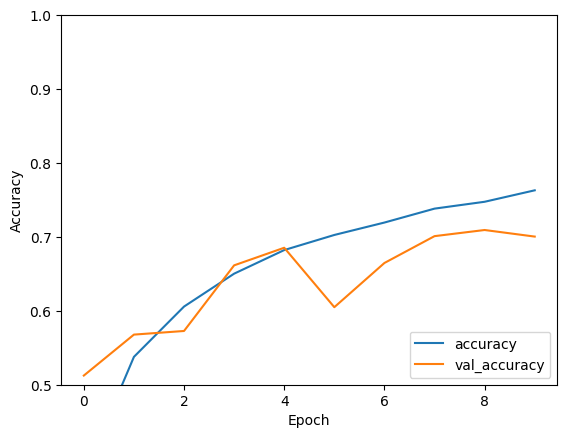

In [20]:
# 🔥 Step 6: 모델 학습 및 성능 평가

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))
#모델 성능 평가
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)


In [21]:
print('Test Accuracy is',test_acc)

Test Accuracy is 0.7003999948501587


## 과제3. 직접사용해 보기. 이미지를 로드하고 cifar-10의 사이즈로 리사이즈

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


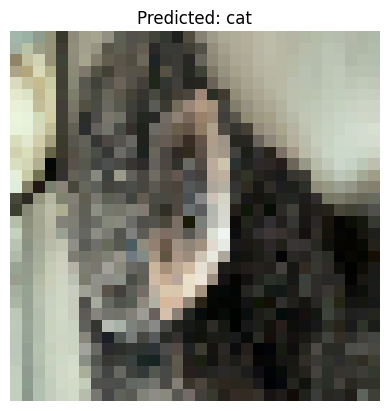

In [25]:
import numpy as np
from tensorflow.keras.preprocessing import image


# 새 이미지를 로드하고 모델 예측 수행
def predict_new_image(image_path, model, class_names):
    # 이미지 로드 및 전처리
    img = image.load_img(image_path, target_size=(32, 32))  # CIFAR-10 크기로 리사이즈 빈칸채우기
    img_array = image.img_to_array(img)  # 이미지를 배열로 변환
    img_array = np.expand_dims(img_array, axis=0)  # 배치를 위해 차원 추가
    img_array = img_array / 255.0  # 정규화 

    # 예측 수행
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)  # 가장 높은 확률의 클래스 인덱스
    class_name = class_names[predicted_class]  # 클래스 이름

    # 결과 출력
    plt.imshow(img)
    plt.title(f"Predicted: {class_name}")
    plt.axis('off')
    plt.show()

# 사용 예시
image_path =  "IMG_0481.JPG"# 예측할 이미지의 경로 절대경로를 입력하면 됩니다. 뭔가 자신의 얼굴사진을 넣어보면 재미있는일이...
predict_new_image(image_path, model, class_names)


## 왜 255.0으로 나누었을까요? 이미지 전처리에 대한 지식이니 조사해보세요.

## Answer: 
#### 흑백(Grayscale) 이미지 기준
0: 완전한 검정 (black)
255: 완전한 흰색 (white)

#### 컬러(RGB) 이미지의 경우
각 채널(R, G, B) 값이 0~255
예: [255, 255, 255] → 흰색
[0, 0, 0] → 검정색
[255, 0, 0] → 빨간색
계산 안정성 증가
→ 큰 값보다 작은 값(0~1)을 다루면 계산 오차가 적습니다.

학습 속도 향상
→ 가중치 업데이트 시 수렴 속도가 빨라집니다.

활성화 함수와의 시너지
→ sigmoid, tanh, relu 등 대부분의 활성화 함수는 입력값이 작을수록 더 잘 작동합니다.


## 과제4. CNN의 inductive bias에 대해서 조사를 해보고 생각해 봅시다.
### CNN은 왜 이미지 처리에 좋을까요? 이미지 말고도 CNN을 잘 쓸 수 있는데는 어디일까요?

Answer: 지역적 연결성 (Local Connectivity):

특성: 전통적인 인공신경망(ANN 또는 MLP)이 모든 입력 뉴런이 다음 계층의 모든 뉴런과 연결되는 완전 연결(fully connected) 구조를 가지는 반면, CNN의 합성곱(Convolutional) 계층 내의 각 뉴런은 입력 이미지의 특정 작고 국지적인 영역(이를 '수용장(Receptive Field)'이라고 함)하고만 연결된다.

이미지 처리에서의 장점: 이미지에서 중요한 특징(예: 모서리, 선분, 질감, 작은 형태)은 대개 이미지의 특정 지역에 집중되어 나타난다. CNN은 이러한 지역적인 패턴을 효율적으로 감지하고 학습하는 데 최적화되어 있다. 이는 모델이 불필요한 전체 이미지 정보를 한꺼번에 처리하는 대신, 핵심적인 지역 정보에 집중할 수 있게 하여 모델의 파라미터 수를 획기적으로 줄이고 계산 효율성을 극대화한다.

가중치 공유 (Parameter Sharing):

특성: 하나의 필터(또는 커널)는 이미지의 특정 특징을 감지하기 위해 학습된 가중치 집합을 가지며, 이 필터는 이미지의 다양한 위치를 이동(슬라이딩)하면서 동일한 가중치 집합을 반복적으로 사용하여 특징을 추출한다.

이미지 처리에서의 장점: 이 특성은 CNN에 병진 불변성(Translation Invariance)이라는 매우 중요한 능력을 부여한다. 즉, 특정 객체나 특징(예: 고양이의 눈)이 이미지의 왼쪽 상단에 있든, 중앙에 있든, 오른쪽 하단에 있든 상관없이 동일한 필터가 이를 인식할 수 있게 된다. 이는 학습에 필요한 데이터의 양을 줄여주고, 객체의 위치 변화에 덜 민감하게 반응함으로써 모델의 일반화 성능을 크게 향상시킨다.병진 불변성(Translation Invariance)은 어떤 대상이나 패턴의 위치가 공간적으로 이동하거나 변하더라도, 그 대상이나 패턴 자체의 특징이나 인식이 변하지 않고 동일하게 유지되는 성질을 말한다.

풀링 (Pooling):

특성: 합성곱 계층 다음에 주로 오는 풀링(Pooling) 계층(예: Max Pooling, Average Pooling)은 특징 맵(Feature Map)의 공간적 해상도를 줄이는(다운샘플링) 역할을 한다. 이는 추출된 특징 중 가장 중요하거나 대표적인 값을 선택하여 다음 계층으로 전달한다.

이미지 처리에서의 장점: 풀링은 미세한 변형(예: 약간의 이동, 회전, 스케일 변화)에 대한 불변성(Invariance)을 제공한다. 이는 모델이 이미지 내의 작은 변화에도 불구하고 일관된 특징 표현을 유지하도록 도와, 잡음(noise)에 강하고 일반화 성능이 더욱 향상된다.

계층적 특징 학습 (Hierarchical Feature Learning):

특성: CNN은 여러 개의 합성곱 계층을 쌓아 올리는 심층 구조를 갖는다. 초기 계층의 필터는 이미지의 가장 기본적인 저수준 특징(예: 수직선, 수평선, 대각선, 단순한 색상 대비)을 학습한다. 이어서 다음 계층들은 이전 계층에서 학습된 저수준 특징들을 조합하여 더 복잡하고 추상적인 고수준 특징(예: 눈, 코, 귀와 같은 얼굴 부분, 자동차의 바퀴, 건물의 창문 등)을 학습한다.

이미지 처리에서의 장점: 이러한 계층적 학습 방식은 인간의 시각 시스템(시각 피질)이 시각 정보를 처리하는 방식과 유사하며, 이미지 내의 복잡하고 다층적인 시각적 계층 구조를 매우 효과적으로 모델링할 수 있게 한다. 이는 단순히 특징을 추출하는 것을 넘어, 이미지에 담긴 의미론적 내용을 깊이 이해하는 데 기여한다.

이러한 Inductive Bias들은 이미지 데이터가 내포하고 있는 고유한 공간적 및 구조적 특성(지역성, 반복성, 계층성)과 완벽하게 조화를 이루며, CNN이 이미지 분류, 객체 탐지, 이미지 분할, 이미지 생성 등 다양한 컴퓨터 비전 작업에서 혁신적인 성과를 달성할 수 있도록 하는 근본적인 원동력이 된다.

이미지 말고도 CNN을 잘 쓸 수 있는 곳

CNN의 강력한 Inductive Bias, 특히 지역적 연결성과 가중치 공유는 이미지 데이터에만 국한되지 않고, 다음과 같은 특성을 가진 다양한 종류의 데이터에도 매우 효과적으로 적용될 수 있다.

데이터가 격자형(Grid-like) 구조를 가지는 경우: 데이터 포인트들이 픽셀처럼 규칙적인 배열을 이루고 있으며, 인접한 데이터 포인트 간에 의미 있는 공간적 또는 시간적 관계가 존재하는 경우.

데이터 내에 지역적인 패턴이 존재하고, 이 패턴이 데이터 내에서 반복적으로 나타나는 경우: 특정 특징이나 패턴이 데이터의 여러 위치에서 유사한 형태로 발현될 수 있는 경우.

데이터의 병진 불변성(Translation Invariance)이 중요한 경우: 데이터 내의 패턴이 위치가 바뀌어도 동일하게 인식되고 처리되어야 하는 경우.

이러한 특성들을 만족하며 CNN이 성공적으로 활용되는 주요 응용 분야는 다음과 같다:

음성 처리 (Speech Processing):

적용 방식: 원본 음성 신호는 1차원 시계열 데이터이지만, 이를 시간-주파수 스펙트로그램(Spectrogram)과 같은 2차원 이미지 형태로 변환하여 CNN에 입력한다. 스펙트로그램은 시간 축과 주파수 축을 가지는 격자형 데이터로, 음성 내의 음소, 단어, 억양 등과 관련된 지역적인 주파수-시간 패턴이 존재하며, 이러한 패턴은 시간 축을 따라 반복될 수 있다.

예시: 음성 인식(Speech Recognition), 화자 식별(Speaker Identification), 감정 인식(Emotion Recognition), 음성 활성 감지(Voice Activity Detection).

자연어 처리 (Natural Language Processing, NLP):

적용 방식: 문장이나 문서 내의 단어들을 '단어 임베딩(Word Embedding)' 기술을 통해 고차원 벡터로 변환한 후, 이 임베딩 벡터들을 문장 순서대로 쌓아 1차원 또는 2차원(여러 임베딩 벡터를 채널처럼 쌓는 경우)의 격자형 데이터를 생성한다. CNN의 필터는 문장 내에서 'n-gram'(연속된 단어 시퀀스)과 같은 지역적인 의미 패턴(예: 특정 구절, 관용어구)을 효과적으로 추출할 수 있다.

예시: 텍스트 분류(Text Classification), 감성 분석(Sentiment Analysis), 개체명 인식(Named Entity Recognition), 질의응답 시스템, 기계 번역(특히 어텐션 메커니즘과 결합 시).

시계열 데이터 분석 (Time Series Analysis):

적용 방식: 주식 가격 변동, 센서 데이터, 의료 생체 신호(ECG, EEG) 등과 같은 1차원 시계열 데이터에 1D CNN을 직접 적용하거나, 다변량 시계열의 경우 여러 변수를 채널처럼 구성하여 2D CNN을 적용할 수 있다. CNN 필터는 시계열 데이터 내의 지역적인 트렌드, 피크, 주기성, 이상 패턴 등을 감지하는 데 매우 유용하다.

예시: 이상 탐지(Anomaly Detection), 미래 값 예측(Forecasting), 활동 분류(Activity Classification), 산업 설비의 상태 모니터링.

추천 시스템 (Recommender Systems):

적용 방식: 사용자-아이템 상호작용 매트릭스(사용자가 어떤 아이템에 대해 부여한 평점이나 행동 기록)나 사용자의 행동 시퀀스(예: 연속적인 웹사이트 클릭 기록)를 격자형 데이터로 간주하여 CNN을 적용할 수 있다. CNN은 사용자의 취향이나 아이템의 특징을 나타내는 지역적인 패턴을 학습하여, 보다 개인화되고 정확한 추천을 제공하는 데 기여한다.

예시: 영화, 음악, 상품 추천.

이처럼 CNN의 근본적인 메커니즘은 단순히 이미지 데이터에만 국한되지 않고, 데이터 내에 지역적이고 반복적인 패턴이 존재하며, 위치 변화에 둔감한 특징 추출이 필요한 모든 형태의 격자형 또는 순차적 데이터에서 강력한 특징 추출기로서의 잠재력을 발휘한다.